<a href="https://colab.research.google.com/github/barisetiawan51-code/BukaToko_DataAnalytics_RevoU_MiniBootcamp/blob/main/Data_Analytics_BukaToko_RevoU_IBS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Overview

Dataset ini menggambarkan log aktivitas user pada sebuah platform e-commerce yaitu BukaToko. Platform tersebut beroperasi di Asia Tenggara, US dan Australia. BukaToko dapat diakses melalui web dan mobile app.

Dataset yang digunakan merekam seluruh perjalan pengguna di aplikasi/web meliputi:
1. Browse produk.
2. Search barang yang diminati.
3. view produk (detail).
4.  Add to Cart (memasukkan ke keranjang).
5. Checkout (dapat berupa purchase atau drop off (gagal beli)).

Dengan data ini, dapat dianalisis conversion tunnel (representasi jalur langka demi langkah yang dilalui pengguna untuk melakukan tindakan) dan drop off points (tahap spesifik dalam funnel di mana pengguna meninggalkan proses sebelum menyelesaikan tindakan tersebut.

User (pengguna) datang dari berbagai channel pemasaran BukaToko, misalnya:
1. Organic Search (Google, Bing)
2. Paid Ads.
3. Email Campaigns.
4. Social Media.
5. Referrals / Direct Visits.

Kolom channel pada dataset ini menunjukkan asal traffic user. Penting untuk mengukur efektivitas marketing.

Dataset ini digunakan sebagai dirty dummy dataset yang artinya bahwa dataset ini fiktif (tidak asli) supaya aman ketika ingin berlatih dan terdapat missing values, data yang tidak konsisten ataupun format salah agar dapat melatih kemampuan data cleaning.

Content Data
1. event_id : Unique identifier untuk setiap event (UUID).
2. user_id : Unique identifier untuk setiap user (UUID).
3. session_id : Identifier untuk satu user session (UUID). Satu user bisa punya banyak event dalam satu session.
4. event_type : Jenis event user (misalnya: page_view, product_view, search, add_to_cart, checkout, purchase, login, logout).
5. event_timestamp : Tanggal & waktu kapan event terjadi.
6. product_id : Identifier produk yang berinteraksi dengan user. Bisa NaN untuk event non-produk (misalnya login/logout).
7. country : Kode negara user (contoh: id, us, sg, dll).
8. device: Jenis device yang dipakai user (contoh: desktop, ios, android).
9. channel : Channel akuisisi user (contoh: organic, paid_search, email, referral, social, direct, unknown).

Bagian Content Data menjelaskan arti setiap kolom, agar tahu bagaimana meenggunakannya ketika menganalisis.

# Load Data and Read Data

In [1]:
from google.colab import drive
import os
import shutil

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd

data_path = '/content/drive/MyDrive/Project Portofolio/Python for Data Analyst_RevoU/Dataset Case Study - dirty_dummy_events.csv'
df = pd.read_csv(data_path)
df.head(5)

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel
0,9bd8725f-5722-41b7-8d95-a5dafec33a56,482c0ae4-ac6c-4eb3-91fe-b0e63c1c2a5d,98b232db-5bec-41d8-88e1-5d2e98899e29,product_view,2025-09-22 16:35:27,P1208,US,IOS,paid_search
1,f6dc704c-a88c-4668-b89d-e6b08e7e02d4,ff6c808d-fa75-4202-801f-a076299a2c0f,d4832af2-0aad-489c-8eb6-22d243f5f5c4,page_view,2025-06-04 21:55:04,NaN,ID,android,referral
2,abb69be8-df83-420b-92f7-149d29a6d32f,78ea2c10-e824-4b3c-b74b-cdb0cbab0610,1f6c5b12-6c79-4b29-bae6-878804723e55,page_view,2025-06-24 2:02:51,NaN,AU,IOS,paid_search
3,76fd2399-0f80-4184-8802-90dac9bf52d3,9c63419c-b3dc-44a6-b8a5-a438e82afee8,ed1c4ded-cf67-463e-b94f-4cebcf62d827,page_view,2025-06-05 12:35:33,NaN,VN,IOS,organic
4,26dcc5fa-334c-420c-be1e-a40eb4b9efac,f9aee3bb-2ba4-4bb3-9eec-44ba4664f93b,9a469fb9-6cf4-4818-b0a6-7302b0bd665a,product_view,2025-07-02 12:19:23,P1315,ID,desktop,social


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   event_id         10000 non-null  object
 1   user_id          10000 non-null  object
 2   session_id       10000 non-null  object
 3   event_type       10000 non-null  object
 4   event_timestamp  10000 non-null  object
 5   product_id       4463 non-null   object
 6   country          10000 non-null  object
 7   device           10000 non-null  object
 8   channel          9900 non-null   object
dtypes: object(9)
memory usage: 703.3+ KB


# Cleaning Data

## Cek Missing Values

In [3]:
df.isnull().sum()

,0
event_id,0
user_id,0
session_id,0
event_type,0
event_timestamp,0
product_id,5537
country,0
device,0
channel,100


In [4]:
df["product_id"] = df["product_id"].fillna("Not_Applicable")

In [5]:
missing_channel = df[df["channel"].isna()]

# tampilkan semua baris tanpa terpotong
pd.set_option("display.max_rows", None)
missing_channel

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel
37,04a86860-ddb5-4685-9887-57d6601b6317,77b9c038-e577-460a-8964-b89f1c8900c7,36daaf11-b13d-4876-a327-b940841709a9,page_view,2025-04-23 14:20:25,Not_Applicable,ID,desktop,NaN
46,706024d8-0e94-4f0e-8f3e-aac362598a40,23ea1990-4f99-4780-9407-9d8d62e833ec,30f4d716-75c9-418e-8561-913e4ce0e8bc,login,2025-06-02 22:34:35,Not_Applicable,ID,android,NaN
111,758d0d79-67bd-4951-a7b4-66731070f365,f42f353e-8a96-446b-81e0-fd1691cc2855,dd237622-35ee-4b7f-9cb1-02befb260338,page_view,2025-09-07 16:24:20,Not_Applicable,SG,IOS,NaN
202,98d96bc3-4d31-4077-9bc4-634fc49324b4,4d6f092b-cd2e-4701-b2df-0b950560ce06,7e32fccb-9000-4fe2-a699-d5655a91cf3a,search,2025-06-14 4:54:33,Not_Applicable,US,android,NaN
315,0f661d66-3e0c-45fb-af3c-ab9b35ac1d33,451256e8-a2fd-4a0d-8246-04a1e050105c,0c02b111-cd5f-4325-910e-fc95450232eb,product_view,2025-08-24 19:51:01,P1346,PH,android,NaN
420,79a5c1b6-bb1d-4fe5-b2f2-e0ebd60c8d37,0be54466-dd79-41cf-973c-b161a4704efc,5a2904a3-f683-4eff-bb66-01777ab355d6,page_view,2025-09-13 19:29:37,Not_Applicable,ID,IOS,NaN
509,b5b40f8b-d340-4be2-bfa7-51a071f3ed5d,b19c5fcb-0e2b-4124-a721-28fa146a163a,a6171564-8007-4825-8f31-4eb7e8d12576,product_view,2025-08-25 17:01:12,P1465,MY,IOS,NaN
552,48c5f751-d620-4284-801f-598211960993,93e833ed-95e0-4e89-9056-0988881e35c5,6b3ed4bd-1b0b-4c96-9f0b-9a526c2f93f7,search,2025-05-18 13:03:20,Not_Applicable,US,android,NaN
560,113a4889-d744-4d3c-a380-b68bb2897595,c7fb64d7-5729-4ee5-b238-e11162cc9480,cc6cdb55-acad-48aa-b502-2ea61a820ad2,page_view,2025-06-23 5:21:46,Not_Applicable,ID,android,NaN
787,2af6db53-4fb4-442f-85db-0b283ef60318,a625cc5d-0aab-4a25-8835-f0ea9128bc07,52819fdb-1caa-41d5-b488-9abe57122ea7,logout,2025-08-25 5:51:27,Not_Applicable,ID,android,NaN


In [6]:
# Simpan dulu baris yang channel-nya NaN (sebelum diisi)
missing_channel_before = df[df["channel"].isna()].copy()

# Imputasi channel dengan modus per grup (country + device)
df["channel"] = df.groupby(["country", "device"])["channel"].transform(
    lambda x: x.fillna(x.mode()[0] if not x.mode().empty else "Unknown")
)

# Ambil baris yang tadinya NaN, lalu cek hasilnya setelah diisi
missing_channel_after = df.loc[missing_channel_before.index]
missing_channel_after

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel
37,04a86860-ddb5-4685-9887-57d6601b6317,77b9c038-e577-460a-8964-b89f1c8900c7,36daaf11-b13d-4876-a327-b940841709a9,page_view,2025-04-23 14:20:25,Not_Applicable,ID,desktop,paid_search
46,706024d8-0e94-4f0e-8f3e-aac362598a40,23ea1990-4f99-4780-9407-9d8d62e833ec,30f4d716-75c9-418e-8561-913e4ce0e8bc,login,2025-06-02 22:34:35,Not_Applicable,ID,android,referral
111,758d0d79-67bd-4951-a7b4-66731070f365,f42f353e-8a96-446b-81e0-fd1691cc2855,dd237622-35ee-4b7f-9cb1-02befb260338,page_view,2025-09-07 16:24:20,Not_Applicable,SG,IOS,paid_search
202,98d96bc3-4d31-4077-9bc4-634fc49324b4,4d6f092b-cd2e-4701-b2df-0b950560ce06,7e32fccb-9000-4fe2-a699-d5655a91cf3a,search,2025-06-14 4:54:33,Not_Applicable,US,android,email
315,0f661d66-3e0c-45fb-af3c-ab9b35ac1d33,451256e8-a2fd-4a0d-8246-04a1e050105c,0c02b111-cd5f-4325-910e-fc95450232eb,product_view,2025-08-24 19:51:01,P1346,PH,android,email
420,79a5c1b6-bb1d-4fe5-b2f2-e0ebd60c8d37,0be54466-dd79-41cf-973c-b161a4704efc,5a2904a3-f683-4eff-bb66-01777ab355d6,page_view,2025-09-13 19:29:37,Not_Applicable,ID,IOS,organic
509,b5b40f8b-d340-4be2-bfa7-51a071f3ed5d,b19c5fcb-0e2b-4124-a721-28fa146a163a,a6171564-8007-4825-8f31-4eb7e8d12576,product_view,2025-08-25 17:01:12,P1465,MY,IOS,email
552,48c5f751-d620-4284-801f-598211960993,93e833ed-95e0-4e89-9056-0988881e35c5,6b3ed4bd-1b0b-4c96-9f0b-9a526c2f93f7,search,2025-05-18 13:03:20,Not_Applicable,US,android,email
560,113a4889-d744-4d3c-a380-b68bb2897595,c7fb64d7-5729-4ee5-b238-e11162cc9480,cc6cdb55-acad-48aa-b502-2ea61a820ad2,page_view,2025-06-23 5:21:46,Not_Applicable,ID,android,referral
787,2af6db53-4fb4-442f-85db-0b283ef60318,a625cc5d-0aab-4a25-8835-f0ea9128bc07,52819fdb-1caa-41d5-b488-9abe57122ea7,logout,2025-08-25 5:51:27,Not_Applicable,ID,android,referral


In [7]:
missing_channel_after

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel
37,04a86860-ddb5-4685-9887-57d6601b6317,77b9c038-e577-460a-8964-b89f1c8900c7,36daaf11-b13d-4876-a327-b940841709a9,page_view,2025-04-23 14:20:25,Not_Applicable,ID,desktop,paid_search
46,706024d8-0e94-4f0e-8f3e-aac362598a40,23ea1990-4f99-4780-9407-9d8d62e833ec,30f4d716-75c9-418e-8561-913e4ce0e8bc,login,2025-06-02 22:34:35,Not_Applicable,ID,android,referral
111,758d0d79-67bd-4951-a7b4-66731070f365,f42f353e-8a96-446b-81e0-fd1691cc2855,dd237622-35ee-4b7f-9cb1-02befb260338,page_view,2025-09-07 16:24:20,Not_Applicable,SG,IOS,paid_search
202,98d96bc3-4d31-4077-9bc4-634fc49324b4,4d6f092b-cd2e-4701-b2df-0b950560ce06,7e32fccb-9000-4fe2-a699-d5655a91cf3a,search,2025-06-14 4:54:33,Not_Applicable,US,android,email
315,0f661d66-3e0c-45fb-af3c-ab9b35ac1d33,451256e8-a2fd-4a0d-8246-04a1e050105c,0c02b111-cd5f-4325-910e-fc95450232eb,product_view,2025-08-24 19:51:01,P1346,PH,android,email
420,79a5c1b6-bb1d-4fe5-b2f2-e0ebd60c8d37,0be54466-dd79-41cf-973c-b161a4704efc,5a2904a3-f683-4eff-bb66-01777ab355d6,page_view,2025-09-13 19:29:37,Not_Applicable,ID,IOS,organic
509,b5b40f8b-d340-4be2-bfa7-51a071f3ed5d,b19c5fcb-0e2b-4124-a721-28fa146a163a,a6171564-8007-4825-8f31-4eb7e8d12576,product_view,2025-08-25 17:01:12,P1465,MY,IOS,email
552,48c5f751-d620-4284-801f-598211960993,93e833ed-95e0-4e89-9056-0988881e35c5,6b3ed4bd-1b0b-4c96-9f0b-9a526c2f93f7,search,2025-05-18 13:03:20,Not_Applicable,US,android,email
560,113a4889-d744-4d3c-a380-b68bb2897595,c7fb64d7-5729-4ee5-b238-e11162cc9480,cc6cdb55-acad-48aa-b502-2ea61a820ad2,page_view,2025-06-23 5:21:46,Not_Applicable,ID,android,referral
787,2af6db53-4fb4-442f-85db-0b283ef60318,a625cc5d-0aab-4a25-8835-f0ea9128bc07,52819fdb-1caa-41d5-b488-9abe57122ea7,logout,2025-08-25 5:51:27,Not_Applicable,ID,android,referral


## Cek Duplikat Data

In [8]:
df.duplicated().sum()

np.int64(0)

## Transform Data

In [9]:
# Validasi tipe data
df['event_timestamp'] = pd.to_datetime(df['event_timestamp'])

In [10]:
df['date'] = df['event_timestamp'].dt.date
df.head()

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel,date
0,9bd8725f-5722-41b7-8d95-a5dafec33a56,482c0ae4-ac6c-4eb3-91fe-b0e63c1c2a5d,98b232db-5bec-41d8-88e1-5d2e98899e29,product_view,2025-09-22 16:35:27,P1208,US,IOS,paid_search,2025-09-22
1,f6dc704c-a88c-4668-b89d-e6b08e7e02d4,ff6c808d-fa75-4202-801f-a076299a2c0f,d4832af2-0aad-489c-8eb6-22d243f5f5c4,page_view,2025-06-04 21:55:04,Not_Applicable,ID,android,referral,2025-06-04
2,abb69be8-df83-420b-92f7-149d29a6d32f,78ea2c10-e824-4b3c-b74b-cdb0cbab0610,1f6c5b12-6c79-4b29-bae6-878804723e55,page_view,2025-06-24 02:02:51,Not_Applicable,AU,IOS,paid_search,2025-06-24
3,76fd2399-0f80-4184-8802-90dac9bf52d3,9c63419c-b3dc-44a6-b8a5-a438e82afee8,ed1c4ded-cf67-463e-b94f-4cebcf62d827,page_view,2025-06-05 12:35:33,Not_Applicable,VN,IOS,organic,2025-06-05
4,26dcc5fa-334c-420c-be1e-a40eb4b9efac,f9aee3bb-2ba4-4bb3-9eec-44ba4664f93b,9a469fb9-6cf4-4818-b0a6-7302b0bd665a,product_view,2025-07-02 12:19:23,P1315,ID,desktop,social,2025-07-02


In [11]:
# Tambahkan kolom time (jam:menit:detik)
df["time"] = df["event_timestamp"].dt.time
df.head()

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel,date,time
0,9bd8725f-5722-41b7-8d95-a5dafec33a56,482c0ae4-ac6c-4eb3-91fe-b0e63c1c2a5d,98b232db-5bec-41d8-88e1-5d2e98899e29,product_view,2025-09-22 16:35:27,P1208,US,IOS,paid_search,2025-09-22,16:35:27
1,f6dc704c-a88c-4668-b89d-e6b08e7e02d4,ff6c808d-fa75-4202-801f-a076299a2c0f,d4832af2-0aad-489c-8eb6-22d243f5f5c4,page_view,2025-06-04 21:55:04,Not_Applicable,ID,android,referral,2025-06-04,21:55:04
2,abb69be8-df83-420b-92f7-149d29a6d32f,78ea2c10-e824-4b3c-b74b-cdb0cbab0610,1f6c5b12-6c79-4b29-bae6-878804723e55,page_view,2025-06-24 02:02:51,Not_Applicable,AU,IOS,paid_search,2025-06-24,02:02:51
3,76fd2399-0f80-4184-8802-90dac9bf52d3,9c63419c-b3dc-44a6-b8a5-a438e82afee8,ed1c4ded-cf67-463e-b94f-4cebcf62d827,page_view,2025-06-05 12:35:33,Not_Applicable,VN,IOS,organic,2025-06-05,12:35:33
4,26dcc5fa-334c-420c-be1e-a40eb4b9efac,f9aee3bb-2ba4-4bb3-9eec-44ba4664f93b,9a469fb9-6cf4-4818-b0a6-7302b0bd665a,product_view,2025-07-02 12:19:23,P1315,ID,desktop,social,2025-07-02,12:19:23


# Exploratory Data Analysis (EDA)

## 1. Analisis Alur Perilaku Pengguna dari Kunjungan hingga Pembelian

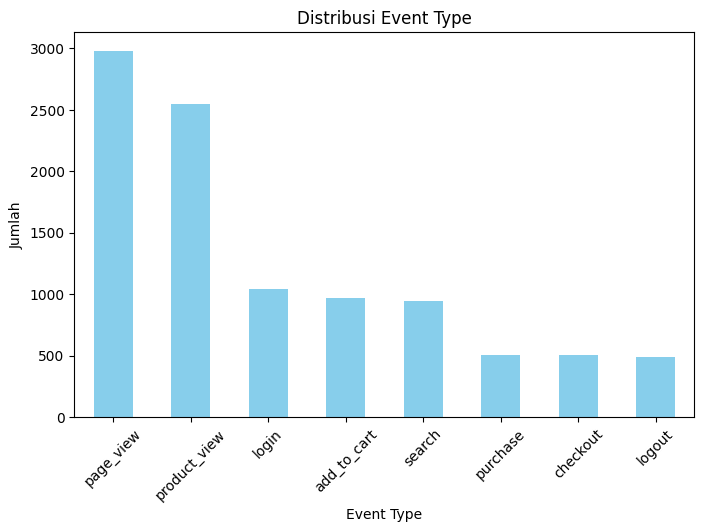

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Distribusi event_type
event_counts = df["event_type"].value_counts()

plt.figure(figsize=(8,5))
event_counts.plot(kind="bar", color="skyblue")
plt.title("Distribusi Event Type")
plt.xlabel("Event Type")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

Dari hasil analisis distribusi event type terlihat bahwa sebagian besar aktivitas user adalah melihat halaman (page view) dan produk (product view), yang menunjukkan bahwa pengguna cukup aktif dalam menjelajah aplikasi. Namun, jumlah event menurun cukup signifikan pada tahap berikutnya, seperti login, search, dan add to cart. Penurunan yang paling jelas terlihat pada tahap checkout dan terutama purchase, di mana hanya sebagian kecil user yang benar-benar menyelesaikan transaksi. Hal ini menunjukkan bahwa meskipun banyak user tertarik melihat produk, tingkat konversi ke pembelian masih rendah. Dengan demikian, perlu adanya strategi untuk mendorong user agar melanjutkan proses hingga pembelian, misalnya melalui promosi, notifikasi keranjang tertinggal, atau penyederhanaan proses checkout.

## 2. Analisis Preferensi Device Pengguna

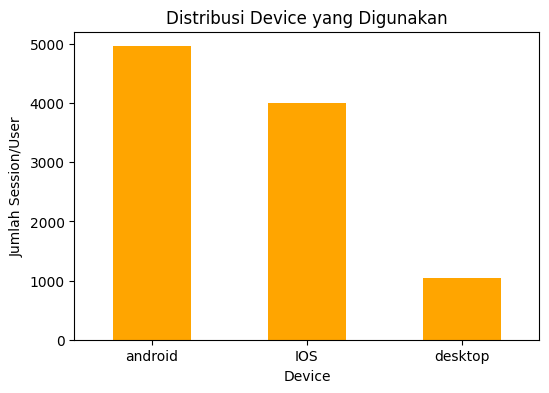

In [13]:
# Distribusi device yang Digunakan
device_counts = df["device"].value_counts()

plt.figure(figsize=(6,4))
device_counts.plot(kind="bar", color="orange")
plt.title("Distribusi Device yang Digunakan")
plt.xlabel("Device")
plt.ylabel("Jumlah Session/User")
plt.xticks(rotation=0)
plt.show()

Grafik menunjukkan bahwa mayoritas sesi berasal dari perangkat mobile, dengan Android paling banyak (sekitar 5.000 sesi), diikuti iOS (sekitar 4.000 sesi), sedangkan desktop relatif sedikit (sekitar 1.000 sesi). Ini menandakan pengguna lebih sering mengakses platform lewat ponsel terutama Android.

## 3. Analisis Distribusi Channel Akuisisi Pengguna

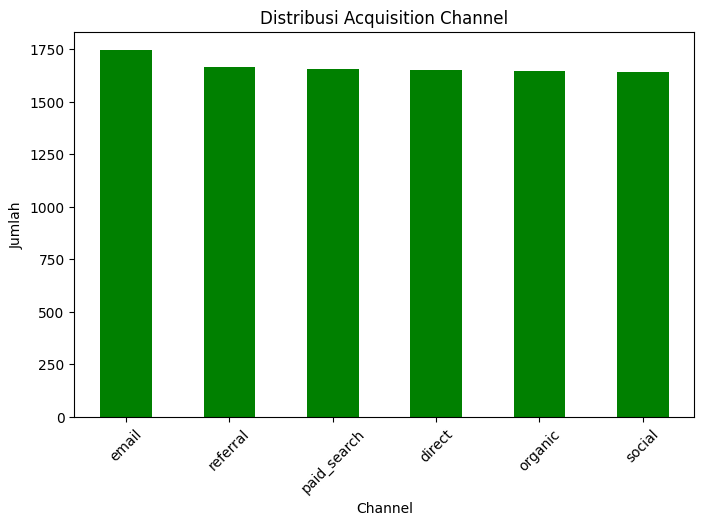

In [14]:
channel_counts = df["channel"].value_counts()

plt.figure(figsize=(8,5))
channel_counts.plot(kind="bar", color="green")
plt.title("Distribusi Acquisition Channel")
plt.xlabel("Channel")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()


Dari visualisasi distribusi channel akuisisi, terlihat bahwa semua saluran (email, referral, paid search, direct, organic, dan social) memiliki jumlah pengguna yang hampir seimbang. Namun, email menjadi channel dengan kontribusi tertinggi, sedikit lebih unggul dibandingkan channel lain. Hal ini menunjukkan bahwa strategi email marketing cukup efektif dalam menarik pengguna baru maupun mempertahankan yang lama. Sementara itu, saluran seperti referral, paid search, direct, organic, dan social memberikan kontribusi yang stabil namun tidak berbeda jauh satu sama lain. Insight ini bisa menjadi dasar untuk mengevaluasi efektivitas kampanye di tiap channel dan menentukan prioritas investasi pemasaran ke depan.

## 4. Analisis Distribusi User Berdasarkan Negara

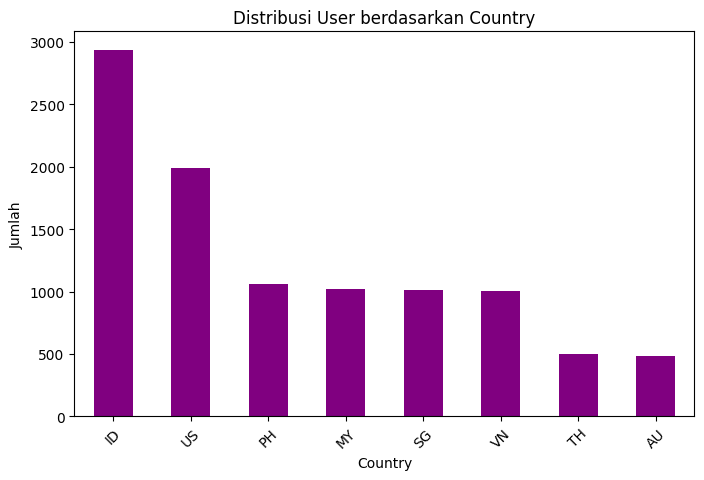

In [15]:
country_counts = df["country"].value_counts()

plt.figure(figsize=(8,5))
country_counts.plot(kind="bar", color="purple")
plt.title("Distribusi User berdasarkan Country")
plt.xlabel("Country")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

Dari visualisasi distribusi user berdasarkan negara, terlihat bahwa Indonesia (ID) memiliki jumlah pengguna terbanyak, diikuti oleh Amerika Serikat (US). Negara-negara lain seperti Filipina (PH), Malaysia (MY), Singapura (SG), dan Vietnam (VN) berada pada tingkat menengah dengan jumlah pengguna yang cukup seimbang. Sementara itu, Thailand (TH) dan Australia (AU) memiliki jumlah pengguna yang relatif paling sedikit. Hasil ini menunjukkan bahwa pasar utama produk berada di Indonesia, dengan potensi ekspansi besar di kawasan Asia Tenggara lainnya, serta peluang penguatan strategi di Amerika Serikat sebagai pasar internasional.

## 5. Analisis Funnel Pengguna: Search → Add to Cart → Checkout → Purchase

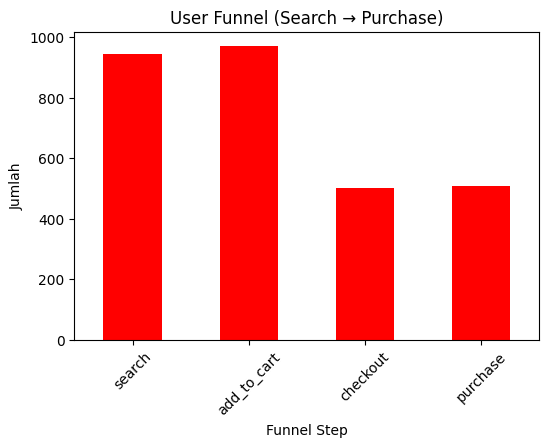

In [16]:
funnel_steps = ["search", "add_to_cart", "checkout", "purchase"]
funnel_counts = df["event_type"].value_counts().reindex(funnel_steps)

plt.figure(figsize=(6,4))
funnel_counts.plot(kind="bar", color="red")
plt.title("User Funnel (Search → Purchase)")
plt.xlabel("Funnel Step")
plt.ylabel("Jumlah")
plt.xticks(rotation=45)
plt.show()

Dari funnel ini terlihat bahwa banyak pengguna mencari produk (sekitar 950) dan hampir semuanya menaruh produk ke keranjang (sekitar 980). Namun, jumlahnya turun drastis saat masuk ke tahap checkout, hanya sekitar 500 orang. Artinya, banyak pengguna berhenti setelah menaruh produk di keranjang, kemungkinan karena harga, ongkos kirim, atau belum yakin untuk membeli. Menariknya, begitu sudah masuk ke tahap checkout, hampir semua pengguna menyelesaikan pembelian. Jadi, masalah utama ada di tahap keranjang menuju checkout, sehingga penting untuk memberi dorongan tambahan seperti promo, diskon, atau pengingat agar mereka mau melanjutkan belanja.

## 6. Tren waktu (Time Series Analysis)

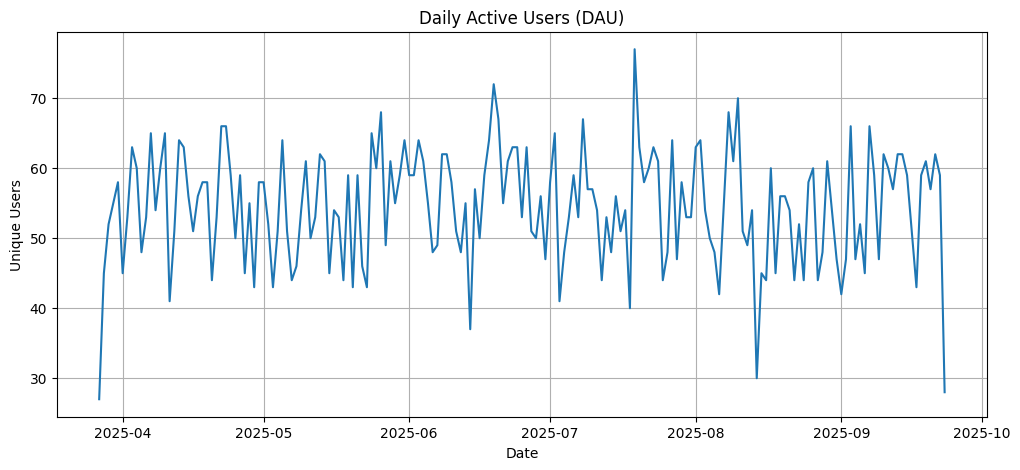

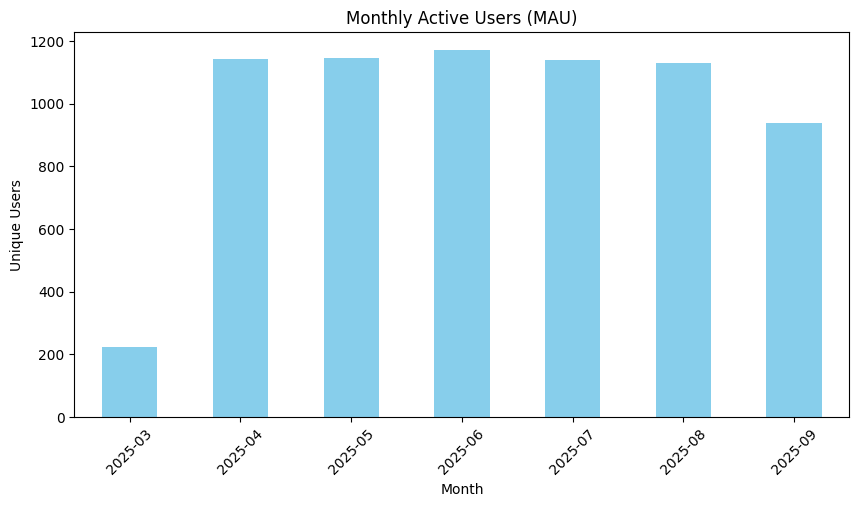

In [17]:
# pertumbuhan jumlah event per hari/bulan.

df["date"] = df["event_timestamp"].dt.date
df["month"] = df["event_timestamp"].dt.to_period("M")

# Daily Active Users (DAU)
dau = df.groupby("date")["user_id"].nunique()

plt.figure(figsize=(12,5))
dau.plot()
plt.title("Daily Active Users (DAU)")
plt.xlabel("Date")
plt.ylabel("Unique Users")
plt.grid(True)
plt.show()

# Monthly Active Users (MAU)
mau = df.groupby("month")["user_id"].nunique()

plt.figure(figsize=(10,5))
mau.plot(kind="bar", color="skyblue")
plt.title("Monthly Active Users (MAU)")
plt.xlabel("Month")
plt.ylabel("Unique Users")
plt.xticks(rotation=45)
plt.show()

Jumlah pengguna aktif harian (DAU) BukaToko cenderung stabil di kisaran 40–70 pengguna per hari dengan fluktuasi yang wajar, sesekali naik hingga lebih dari 70 pengguna namun juga turun ke angka sekitar 30 pengguna. Sementara itu, jumlah pengguna aktif bulanan (MAU) mengalami lonjakan signifikan dari sekitar 220 pengguna pada bulan Maret menjadi lebih dari 1.100 pengguna pada bulan April, lalu bertahan relatif stabil hingga Agustus sebelum menurun ke sekitar 940 pengguna pada September. Pola ini menunjukkan bahwa meskipun penggunaan harian cukup konsisten, terdapat tanda penurunan pada skala bulanan sehingga strategi retensi perlu diperkuat agar pengguna tetap aktif dan tidak meninggalkan platform.

## 7. Funnel Lengkap: Page → Product → ATC → Checkout → Purchase

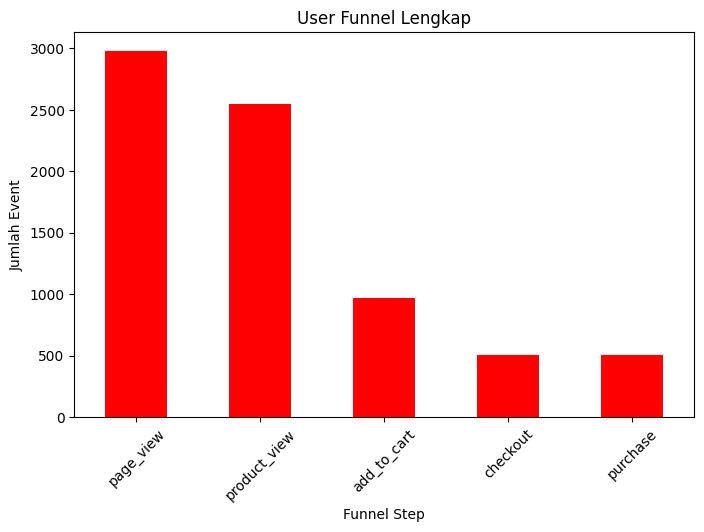

In [18]:
funnel_steps2 = ["page_view", "product_view", "add_to_cart", "checkout", "purchase"]
funnel_counts2 = df["event_type"].value_counts().reindex(funnel_steps2)

plt.figure(figsize=(8,5))
funnel_counts2.plot(kind="bar", color="red")
plt.title("User Funnel Lengkap")
plt.xlabel("Funnel Step")
plt.ylabel("Jumlah Event")
plt.xticks(rotation=45)
plt.show()

Funnel lengkap menunjukkan bahwa jumlah pengguna paling banyak ada di tahap awal, yaitu sekitar 3.000 page view dan 2.500 product view. Namun, jumlahnya turun drastis pada tahap add to cart yang hanya sekitar 1.000, lalu kembali turun menjadi sekitar 500 pada tahap checkout. Menariknya, dari checkout ke purchase jumlahnya hampir sama, artinya jika pengguna sudah sampai tahap checkout, mereka cenderung menyelesaikan pembelian. Dengan demikian, titik drop-off terbesar ada di tahap product view ke add to cart serta add to cart ke checkout, sehingga strategi peningkatan konversi sebaiknya difokuskan untuk mendorong pengguna lebih banyak memasukkan produk ke keranjang dan melanjutkan ke proses checkout. Misalnya dengan penawaran promo, rekomendasi produk relevan, atau pengingat keranjang.

## 8. Analisis Purchase Berdasarkan Channel

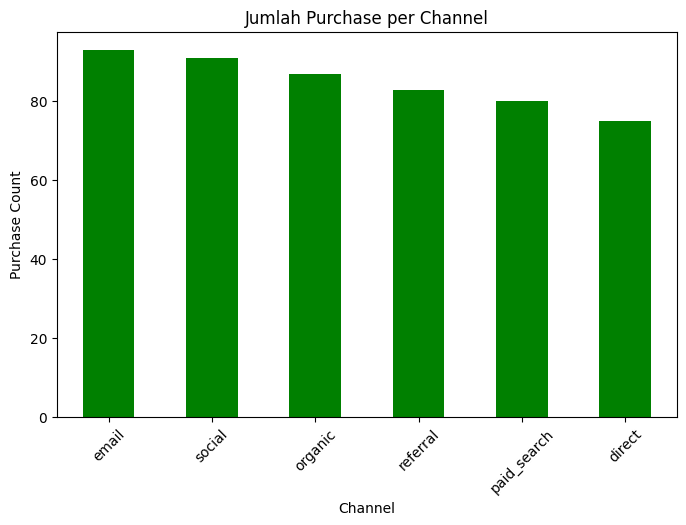

In [19]:
channel_purchase = df[df["event_type"]=="purchase"]["channel"].value_counts()

plt.figure(figsize=(8,5))
channel_purchase.plot(kind="bar", color="green")
plt.title("Jumlah Purchase per Channel")
plt.xlabel("Channel")
plt.ylabel("Purchase Count")
plt.xticks(rotation=45)
plt.show()

## 9. Analisis Perilaku Pengguna Berdasarkan Device (Distribusi event per device)

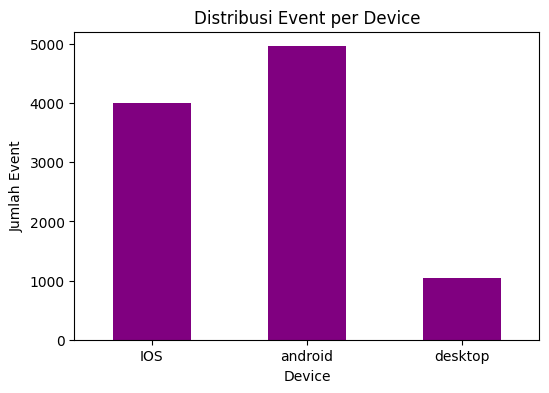

In [20]:
device_event = df.groupby("device")["event_id"].count()

plt.figure(figsize=(6,4))
device_event.plot(kind="bar", color="purple")
plt.title("Distribusi Event per Device")
plt.xlabel("Device")
plt.ylabel("Jumlah Event")
plt.xticks(rotation=0)
plt.show()

Dari distribusi event per device, terlihat bahwa pengguna Android mendominasi aktivitas dengan jumlah event tertinggi, disusul oleh pengguna iOS. Sementara itu, pengguna desktop hanya menyumbang sebagian kecil dari total event. Hal ini menunjukkan bahwa mayoritas interaksi pengguna terjadi melalui perangkat mobile, terutama Android. Dengan demikian, strategi pengembangan dan optimasi aplikasi sebaiknya lebih difokuskan pada pengalaman pengguna di perangkat mobile, tanpa mengabaikan potensi pengguna desktop yang meskipun kecil, tetap bisa menjadi segmen penting untuk kebutuhan tertentu.

## 10. Analisis Top Produk yang Paling Banyak Dibeli

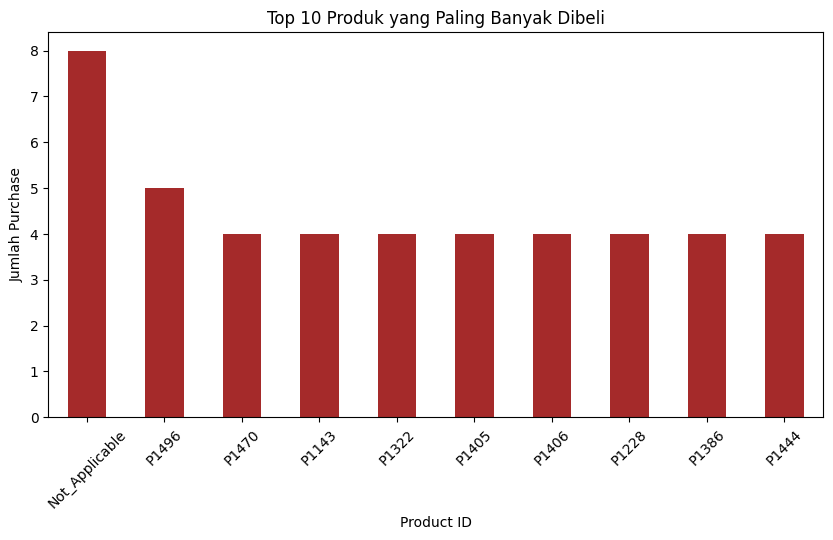

In [21]:
# Produk mana paling banyak di-view, di-add_to_cart, dan di-purchase.

top_products = df[df["event_type"]=="purchase"]["product_id"].value_counts().head(10)

plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="brown")
plt.title("Top 10 Produk yang Paling Banyak Dibeli")
plt.xlabel("Product ID")
plt.ylabel("Jumlah Purchase")
plt.xticks(rotation=45)
plt.show()

Berdasarkan data, produk dengan kategori Not_Applicable menempati posisi teratas dengan jumlah pembelian paling tinggi, yaitu sebanyak 8 kali. Di urutan berikutnya ada produk dengan ID P1496 dengan 5 pembelian, sedangkan produk lainnya seperti P1470, P1143, P1322, P1405, P1406, P1228, P1386, dan P1444 memiliki jumlah pembelian yang sama, yaitu 4 kali. Hasil ini menunjukkan bahwa meskipun ada produk yang lebih menonjol, secara umum distribusi pembelian antar produk relatif merata, tanpa ada dominasi yang terlalu besar dari satu produk tertentu.

## 11. Analisis Negara dengan Jumlah Event Terbanyak

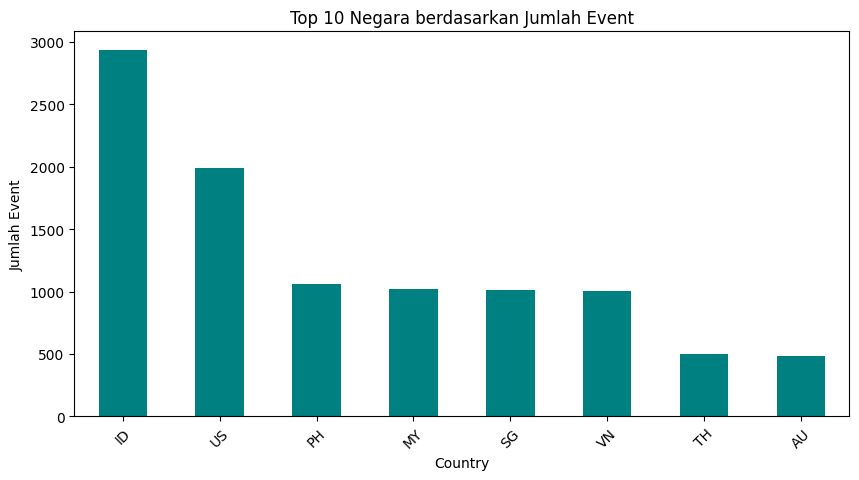

In [22]:
# Negara mana dengan conversion rate tertinggi.

country_event = df.groupby("country")["event_id"].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
country_event.plot(kind="bar", color="teal")
plt.title("Top 10 Negara berdasarkan Jumlah Event")
plt.xlabel("Country")
plt.ylabel("Jumlah Event")
plt.xticks(rotation=45)
plt.show()

# Business Questions (Case Study Questions)

## Which country has the most active user in Q2 2025? Make visualizations with comparaions of all countries.

In [23]:
# Filter data Q2 2025
q2_2025 = df[(df["event_timestamp"].dt.year == 2025) &
             (df["event_timestamp"].dt.quarter == 2)]

In [24]:
# Hitung unique user per country
active_users_q2 = q2_2025.groupby("country")["user_id"].nunique().sort_values(ascending=False)

Untuk mengetahui negara mana yang memiliki pengguna aktif terbanyak pada Q2 2025, dilakukan beberapa tahapan analisis. Pertama, data difilter agar hanya mencakup periode tahun 2025 pada kuartal kedua (Q2), sehingga analisis lebih fokus pada rentang waktu yang ditentukan. Selanjutnya, data dikelompokkan berdasarkan country, lalu dihitung jumlah unique user di masing-masing negara untuk mengidentifikasi berapa banyak pengguna aktif yang benar-benar berbeda. Hasil perhitungan kemudian diurutkan dari yang terbesar ke terkecil, sehingga terlihat dengan jelas negara mana yang mendominasi. Terakhir, dibuat visualisasi perbandingan dalam bentuk grafik batang, yang memudahkan dalam membaca perbandingan jumlah pengguna aktif antarnegara selama Q2 2025.

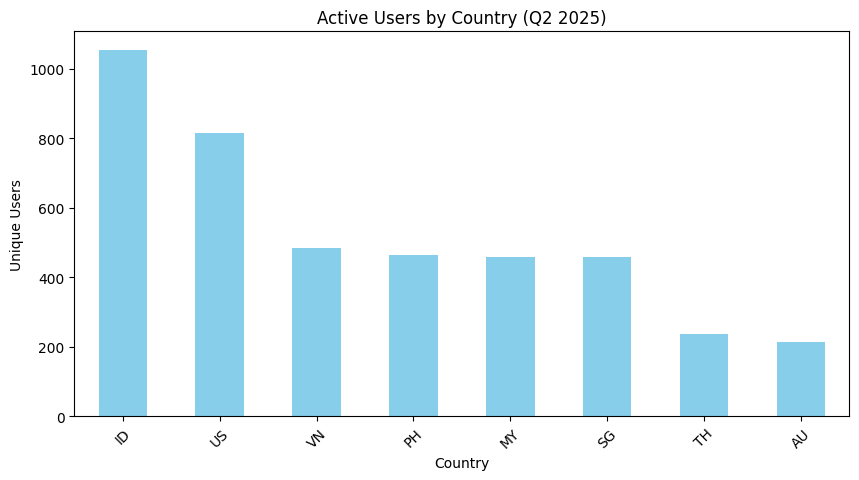

In [25]:
import pandas as pd
import matplotlib.pyplot as plt

# Visualisasi
plt.figure(figsize=(10,5))
active_users_q2.plot(kind="bar", color="skyblue")
plt.title("Active Users by Country (Q2 2025)")
plt.ylabel("Unique Users")
plt.xlabel("Country")
plt.xticks(rotation=45)
plt.show()

Grafik menunjukkan bahwa Indonesia (ID) menempati posisi pertama dengan jumlah pengguna aktif terbanyak di Q2 2025, yaitu sekitar 1.070 pengguna unik. Di urutan kedua terdapat Amerika Serikat (US) dengan 820 pengguna, lalu disusul oleh Vietnam (490), Filipina (470), Malaysia (460), dan Singapura (455) yang jumlahnya relatif berdekatan. Sementara itu, Thailand (235) dan Australia (210) berada di posisi terbawah dengan jumlah pengguna aktif yang jauh lebih kecil dibanding negara lain.

Secara keseluruhan, terlihat jelas bahwa Indonesia dan Amerika Serikat menjadi pasar utama, dengan kontribusi pengguna jauh lebih besar dibanding negara lainnya. Hal ini bisa menjadi peluang strategis bagi platform untuk memperkuat engagement dan layanan di dua negara tersebut, sambil tetap mengembangkan potensi di pasar Asia Tenggara lainnya.

## How is the trend of Monthly Active User for each channel?

In [26]:
# Ambil daftar tahun unik
unique_years = df["event_timestamp"].dt.year.unique()

print("Tahun yang ada di dataset:", unique_years)

Tahun yang ada di dataset: [2025]


In [27]:
# Buat kolom year-month
df["year_month"] = df["event_timestamp"].dt.to_period("M")

In [28]:
df.head()

,event_id,user_id,session_id,event_type,event_timestamp,product_id,country,device,channel,date,time,month,year_month
0,9bd8725f-5722-41b7-8d95-a5dafec33a56,482c0ae4-ac6c-4eb3-91fe-b0e63c1c2a5d,98b232db-5bec-41d8-88e1-5d2e98899e29,product_view,2025-09-22 16:35:27,P1208,US,IOS,paid_search,2025-09-22,16:35:27,2025-09,2025-09
1,f6dc704c-a88c-4668-b89d-e6b08e7e02d4,ff6c808d-fa75-4202-801f-a076299a2c0f,d4832af2-0aad-489c-8eb6-22d243f5f5c4,page_view,2025-06-04 21:55:04,Not_Applicable,ID,android,referral,2025-06-04,21:55:04,2025-06,2025-06
2,abb69be8-df83-420b-92f7-149d29a6d32f,78ea2c10-e824-4b3c-b74b-cdb0cbab0610,1f6c5b12-6c79-4b29-bae6-878804723e55,page_view,2025-06-24 02:02:51,Not_Applicable,AU,IOS,paid_search,2025-06-24,02:02:51,2025-06,2025-06
3,76fd2399-0f80-4184-8802-90dac9bf52d3,9c63419c-b3dc-44a6-b8a5-a438e82afee8,ed1c4ded-cf67-463e-b94f-4cebcf62d827,page_view,2025-06-05 12:35:33,Not_Applicable,VN,IOS,organic,2025-06-05,12:35:33,2025-06,2025-06
4,26dcc5fa-334c-420c-be1e-a40eb4b9efac,f9aee3bb-2ba4-4bb3-9eec-44ba4664f93b,9a469fb9-6cf4-4818-b0a6-7302b0bd665a,product_view,2025-07-02 12:19:23,P1315,ID,desktop,social,2025-07-02,12:19:23,2025-07,2025-07


In [29]:
# Hitung unique user per channel per bulan
# Monthly Active User (MAU)
mau_channel = df.groupby(["year_month", "channel"])["user_id"].nunique().reset_index()

Langkah analisis tren Pengguna Aktif Bulanan (MAU) per saluran dilakukan dengan beberapa tahapan. Pertama, dicek terlebih dahulu rentang tahun yang ada pada dataset, dan hasilnya menunjukkan bahwa data hanya mencakup tahun 2025. Setelah itu, dibuat kolom baru bernama year_month dengan format periode bulanan agar analisis lebih terstruktur. Selanjutnya, dilakukan pengelompokan data berdasarkan kombinasi year_month dan channel, lalu dihitung jumlah unique user pada tiap kelompok. Dari proses ini dihasilkan data MAU per saluran untuk setiap bulan, yang kemudian divisualisasikan sehingga dapat terlihat pola tren pengguna aktif bulanan di masing-masing channel sepanjang tahun 2025.

<Figure size 1200x600 with 0 Axes>

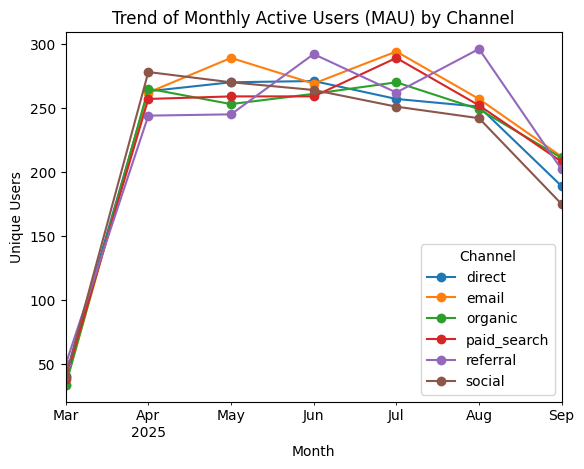

In [30]:
# Pivot supaya bisa diplot sebagai line chart
mau_pivot = mau_channel.pivot(index="year_month", columns="channel", values="user_id")

# Visualisasi tren
plt.figure(figsize=(12,6))
mau_pivot.plot(marker="o")
plt.title("Trend of Monthly Active Users (MAU) by Channel")
plt.ylabel("Unique Users")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.legend(title="Channel")
plt.show()

Tren Monthly Active Users (MAU) per channel menunjukkan pola yang mirip, di mana seluruh channel mengalami lonjakan tajam dari Maret ke April 2025, kemudian stabil di kisaran 250–300 pengguna aktif per bulan. Channel email dan referral sempat mencatat puncak tertinggi pada Juli dan Agustus, mendekati 300 pengguna, sementara channel lain seperti direct, organic, paid_search, dan social berfluktuasi di sekitar angka 250–280. Namun, memasuki September, semua channel mengalami penurunan cukup signifikan, dengan direct dan social turun paling tajam. Hal ini menunjukkan bahwa meskipun ada konsistensi pertumbuhan di pertengahan tahun, tantangan terbesar adalah mempertahankan jumlah pengguna aktif di bulan-bulan berikutnya.

## Which device is used most often (by session)?

In [31]:
# Hitung jumlah session per device
device_sessions = df.groupby("device")["session_id"].nunique().reset_index()

# Urutkan dari yang terbanyak
device_sessions = device_sessions.sort_values(by="session_id", ascending=False)

Untuk mengetahui perangkat mana yang paling sering digunakan berdasarkan jumlah sesi, dilakukan beberapa tahapan analisis. Pertama, data dikelompokkan menggunakan kolom device, lalu dihitung jumlah unique session_id pada setiap perangkat. Perhitungan ini penting karena satu pengguna bisa memiliki banyak event dalam satu sesi, sehingga pengukuran berbasis sesi lebih akurat untuk melihat frekuensi penggunaan perangkat. Setelah itu, hasilnya diurutkan dari jumlah sesi terbanyak hingga paling sedikit, sehingga terlihat perangkat mana yang paling dominan digunakan oleh pengguna saat mengakses platform.

In [32]:
device_sessions

,device,session_id
1,android,4961
0,IOS,4000
2,desktop,1039


Berdasarkan data jumlah sesi per perangkat, terlihat bahwa mayoritas pengguna mengakses platform melalui Android dengan total 4.961 sesi, diikuti oleh iOS dengan 4.000 sesi, sementara desktop hanya menyumbang 1.039 sesi. Hal ini menunjukkan bahwa akses melalui perangkat mobile jauh lebih dominan dibandingkan desktop, dengan Android sebagai pemimpin utama. Kecenderungan ini mengindikasikan bahwa strategi pengembangan platform sebaiknya lebih berfokus pada pengalaman pengguna di mobile, terutama Android, tanpa mengabaikan iOS. Sementara itu, meskipun jumlah sesi dari desktop relatif kecil, perangkat ini tetap perlu diperhatikan untuk memastikan kenyamanan pengguna yang lebih memilih mengakses lewat komputer.

## What percentage of users who search end up adding to carts (ATC) on the same day? (Attribution Cart event from search page)

In [33]:
# Filter search dan add_to_cart
search_events = df[df["event_type"] == "search"].copy()
atc_events = df[df["event_type"] == "add_to_cart"].copy()

In [34]:
# Merge berdasarkan user_id dan date
merged = pd.merge(
    search_events[["user_id", "date", "event_timestamp"]],
    atc_events[["user_id", "date", "event_timestamp"]],
    on=["user_id", "date"],
    suffixes=("_search", "_atc")
)

In [35]:
# Pastikan add_to_cart terjadi SETELAH search
merged = merged[merged["event_timestamp_atc"] > merged["event_timestamp_search"]]

Untuk menghitung persentase pengguna yang melakukan pencarian (search) lalu melanjutkan ke tindakan add_to_cart (ATC) pada hari yang sama, dilakukan beberapa tahapan analisis. Pertama, data difilter untuk memisahkan event dengan tipe search dan add_to_cart. Kedua, kedua subset data tersebut digabungkan (merge) berdasarkan user_id dan tanggal (date), agar dapat melacak aktivitas pengguna pada hari yang sama. Setelah itu, difilter kembali supaya hanya menghitung kasus di mana event add_to_cart terjadi setelah event search, sehingga urutan perilaku pengguna valid. Langkah berikutnya adalah menghitung jumlah unik pengguna yang melakukan search, lalu membandingkannya dengan jumlah unik pengguna yang benar-benar melakukan ATC setelah search di hari yang sama. Terakhir, dihitung persentasenya dengan rumus (users_search_atc / users_search) * 100, sehingga diperoleh seberapa besar konversi dari pencarian produk menjadi tindakan memasukkan barang ke keranjang.

In [36]:
# Hitung persentase
users_search = search_events["user_id"].nunique()
users_search_atc = merged["user_id"].nunique()

percentage = (users_search_atc / users_search) * 100
print(f"Persentase users search yang add_to_cart di hari sama: {percentage:.2f}%")

Persentase users search yang add_to_cart di hari sama: 0.13%


Hasil analisis menunjukkan bahwa hanya 0,13% pengguna yang melakukan pencarian produk kemudian melanjutkan ke tindakan add to cart pada hari yang sama. Angka ini sangat rendah, sehingga mengindikasikan adanya potensi masalah pada tahap transisi dari search ke ATC. Hal ini bisa terjadi karena beberapa faktor, misalnya hasil pencarian yang kurang relevan dengan kebutuhan pengguna, tampilan atau pengalaman pencarian yang tidak optimal, ataupun adanya hambatan lain seperti harga dan ketersediaan produk. Rendahnya konversi ini penting untuk diperhatikan, karena menunjukkan bahwa meskipun banyak pengguna melakukan pencarian, hanya sebagian sangat kecil yang benar-benar tertarik untuk memasukkan produk ke keranjang. Dengan kata lain, peningkatan kualitas fitur pencarian serta rekomendasi produk dapat menjadi strategi utama untuk memperbaiki performa funnel di tahap ini.

# Conclusion & Recomendations

Secara keseluruhan, analisis menunjukkan bahwa Indonesia menjadi pasar utama dengan jumlah pengguna dan aktivitas tertinggi, diikuti oleh Amerika Serikat dan beberapa negara Asia Tenggara lainnya seperti Filipina, Malaysia, Singapura, dan Vietnam yang menempati posisi menengah. Dari sisi perangkat, mayoritas pengguna lebih aktif menggunakan smartphone (Android dan iOS) dibandingkan desktop, menandakan pentingnya optimalisasi pengalaman mobile. Sementara itu, dari saluran akuisisi, email masih menjadi channel paling efektif dalam mendorong akuisisi dan pembelian, meskipun saluran lain seperti sosial media, referral, dan organic juga berkontribusi cukup merata. Namun, meskipun jumlah pengguna dan interaksi awal seperti page view dan product view cukup tinggi, tingkat konversi ke tahap add to cart dan purchase masih rendah, terlihat dari kecilnya persentase pengguna yang melakukan pembelian setelah pencarian. Hal ini mengindikasikan adanya potensi peningkatan di sisi user journey, khususnya dalam mendorong pengguna dari tahap eksplorasi menuju tahap transaksi. Insight ini menekankan perlunya strategi yang berfokus pada optimalisasi funnel konversi, peningkatan engagement pada perangkat mobile, serta personalisasi strategi akuisisi per channel dan negara target utama.